In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [29]:
# Data Preprocessing

In [30]:
# Load the Dataset
df = pd.read_excel("prices 002.xlsx")
df.head()

,date,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84
0,2011-01-03,111.78,12.6968,5.1426,71.19,101.02,28926,140.90,57.09,154.83,...,120.171875,108.50,121.50000,2834.0,805.50,1322,94.435,94.70,1416.0,5893.0
1,2011-01-04,112.07,12.5654,5.0328,72.06,99.65,29046,140.23,56.33,155.73,...,120.312500,109.24,121.31250,2837.0,789.25,1290,94.445,94.72,1406.0,5959.0
2,2011-01-05,109.09,12.7200,5.0109,72.47,99.13,28609,140.42,57.25,154.85,...,119.234375,108.08,119.46875,2826.0,808.25,1272,94.460,94.79,1395.0,5993.0
3,2011-01-06,107.57,12.8051,4.9670,72.39,98.61,28720,139.60,56.90,154.61,...,119.812500,108.02,120.09375,2830.0,789.00,1326,94.405,94.78,1430.0,5977.0
4,2011-01-07,112.63,13.0912,4.8573,72.63,98.74,28505,139.75,56.35,155.41,...,120.671875,108.50,120.96875,2803.0,774.00,1289,94.365,94.79,1405.0,5943.5


In [31]:
print(df.info())
print(df.describe()) # Conclusion: Each column should have 3314 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3314 non-null   datetime64[ns]
 1   y       3276 non-null   float64       
 2   x_1     3270 non-null   float64       
 3   x_2     3270 non-null   float64       
 4   x_3     3274 non-null   float64       
 5   x_4     3314 non-null   float64       
 6   x_5     3314 non-null   int64         
 7   x_6     3314 non-null   float64       
 8   x_7     3314 non-null   float64       
 9   x_8     3314 non-null   float64       
 10  x_9     3314 non-null   float64       
 11  x_10    3314 non-null   float64       
 12  x_11    3314 non-null   float64       
 13  x_12    3314 non-null   float64       
 14  x_13    3314 non-null   float64       
 15  x_14    3314 non-null   float64       
 16  x_15    3314 non-null   float64       
 17  x_16    3314 non-null   float64       
 18  x_17    

In [32]:
# Handle Missing Values
df.isnull().sum()

date     0
y       38
x_1     44
x_2     44
x_3     40
        ..
x_80     0
x_81     0
x_82     0
x_83     0
x_84     0
Length: 86, dtype: int64

In [33]:
# There are missing values, which can be filled with column means
df.fillna(df.mean(), inplace=True)
print(df.describe()) # Conclusion: Each column has 3314 entries, null values have been handled

                                date            y          x_1          x_2  \
count                           3314  3314.000000  3314.000000  3314.000000   
mean   2017-07-06 03:02:03.838261760   139.883226    46.070018    19.226117   
min              2011-01-03 00:00:00    73.180000    11.098500     2.165300   
25%              2014-04-03 06:00:00   110.812500    30.302950    15.290000   
50%              2017-07-08 12:00:00   130.050000    51.015800    21.060000   
75%              2020-10-07 18:00:00   149.460000    60.393125    24.840000   
max              2023-12-29 00:00:00   368.760000    90.296300    37.750000   
std                              NaN    45.566254    20.503026     8.242600   

               x_3          x_4           x_5          x_6         x_7  \
count  3314.000000  3314.000000   3314.000000  3314.000000  3314.00000   
mean     80.276362    80.214568  48270.831020   148.339747    43.43182   
min      44.550000    57.800000  25068.000000   138.500000    24.9

In [34]:
df.set_index("date", inplace=True)

In [35]:
# Visualizing Spot Price vs. Equities

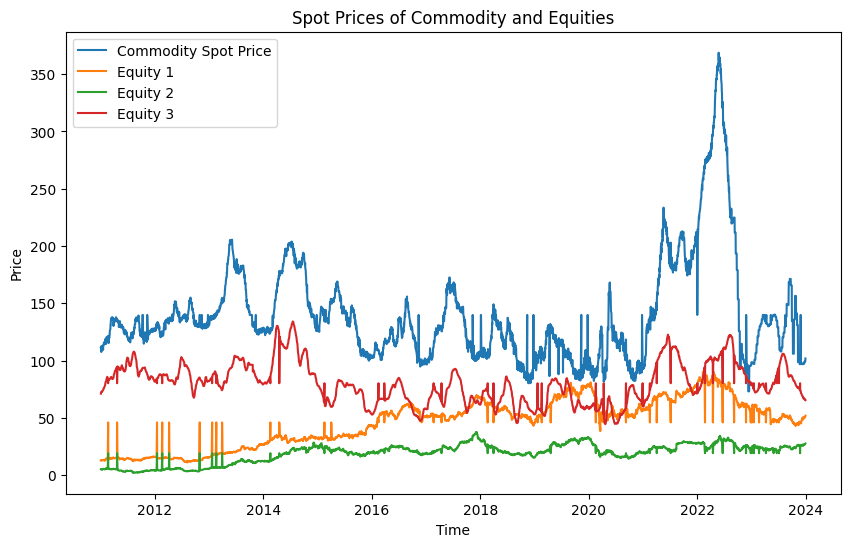

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['y'], label='Commodity Spot Price')
sns.lineplot(x=df.index, y=df['x_1'], label='Equity 1')
sns.lineplot(x=df.index, y=df['x_2'], label='Equity 2')
sns.lineplot(x=df.index, y=df['x_3'], label='Equity 3')
plt.legend()
plt.title("Spot Prices of Commodity and Equities")
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [37]:
# standarize data
data_standardized = (df - df.mean()) / df.std()
data_standardized.describe()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84
count,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,...,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03
mean,1.372201e-16,-2.058301e-16,-6.861004e-17,6.517954e-16,6.861004e-17,1.372201e-16,3.224672e-15,1.715251e-16,-6.861004e-16,4.802703e-16,...,3.602027e-16,-3.087452e-16,7.890155e-16,5.488803e-16,6.861004e-17,1.715251e-17,-1.224689e-14,-4.082297e-15,5.145753e-16,-5.488803e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.463873e+00,-1.705676e+00,-2.069834e+00,-2.014101e+00,-1.728056e+00,-1.945322e+00,-2.585920e+00,-1.302395e+00,-2.232319e+00,-1.176749e+00,...,-2.951182e+00,-1.922427e+00,-2.622102e+00,-2.391155e+00,-1.644884e+00,-1.785907e+00,-2.554643e+00,-2.641026e+00,-1.769776e+00,-2.720185e+00
25%,-6.379881e-01,-7.690118e-01,-4.775335e-01,-7.670689e-01,-7.179160e-01,-4.995036e-01,-8.691559e-01,-8.405281e-01,-8.372560e-01,-9.184516e-01,...,-5.659375e-01,-8.838224e-01,-6.581713e-01,-6.242373e-01,-7.539681e-01,-8.038007e-01,-7.178730e-01,-6.517819e-01,-8.064041e-01,-7.995530e-01
50%,-2.158006e-01,2.412220e-01,2.224884e-01,-2.995595e-02,-3.611579e-01,-8.634088e-02,2.641841e-01,-3.461754e-01,-2.874572e-01,-2.846400e-01,...,6.233869e-02,3.591569e-03,-1.414159e-02,1.811300e-02,-1.761215e-01,-1.952633e-01,3.978905e-02,7.844695e-02,-2.115622e-01,1.054869e-01
75%,2.101725e-01,6.985850e-01,6.810816e-01,6.333048e-01,8.490444e-01,4.329631e-01,8.462938e-01,7.862454e-01,9.894527e-01,8.357246e-01,...,6.988816e-01,7.456883e-01,6.504313e-01,5.622001e-01,5.932304e-01,6.395807e-01,6.636620e-01,5.400859e-01,6.612229e-01,8.670879e-01
max,5.022945e+00,2.157061e+00,2.247335e+00,3.038294e+00,2.247745e+00,2.264528e+00,1.915904e+00,3.331103e+00,2.002197e+00,2.492837e+00,...,1.973621e+00,2.092245e+00,2.577385e+00,2.320366e+00,5.444144e+00,2.749971e+00,1.983414e+00,1.744544e+00,3.068107e+00,1.850536e+00


In [38]:
# Check correlation between commodity spot prices and equities

In [39]:
correlation = data_standardized[['y', 'x_1', 'x_2', 'x_3']].corr()
print(correlation)

            y       x_1       x_2       x_3
y    1.000000  0.190496  0.163565  0.615200
x_1  0.190496  1.000000  0.869352 -0.195065
x_2  0.163565  0.869352  1.000000 -0.146412
x_3  0.615200 -0.195065 -0.146412  1.000000


In [40]:
# Conclusion
pd.set_option('display.max_colwidth', None)
correlation_data = {
    'Variables': ['x_1 & y', 'x_2 & y', 'x_3 & y', 'x_1 & x_2', 'x_1 & x_3', 'x_2 & x_3'],
    'Correlation Strength': ['Weak Positive', 'Weak Positive', 'Moderate Positive', 'High', 'Weak Negative', 'Weak Negative'],
    'Interpretation': [
        'Relation of x_1 with y is not very strong',
        'Relation of x_2 with y is not very strong',
        'From a prediction point of view, x_3 can be a strong predictor',
        'From a prediction point of view, they can be replaced by a single variable, we will use PCA to prevent multicollinearity',
        'Relation of x_1 with x_3 is weakly inverse',
        'Relation of x_2 with x_3 is weakly inverse'
    ]
}

corr_df = pd.DataFrame(correlation_data)
corr_df


,Variables,Correlation Strength,Interpretation
0,x_1 & y,Weak Positive,Relation of x_1 with y is not very strong
1,x_2 & y,Weak Positive,Relation of x_2 with y is not very strong
2,x_3 & y,Moderate Positive,"From a prediction point of view, x_3 can be a strong predictor"
3,x_1 & x_2,High,"From a prediction point of view, they can be replaced by a single variable, we will use PCA to prevent multicollinearity"
4,x_1 & x_3,Weak Negative,Relation of x_1 with x_3 is weakly inverse
5,x_2 & x_3,Weak Negative,Relation of x_2 with x_3 is weakly inverse


In [41]:
pca = PCA(n_components=1) 
principal_component = pca.fit_transform(data_standardized[['x_1', 'x_2']])
print(principal_component)
print(pca.explained_variance_ratio_)

[[-2.35915375]
 [-2.37310486]
 [-2.36965176]
 ...
 [ 0.85658393]
 [ 0.91754235]
 [ 0.92793254]]
[0.93467606]


In [42]:
data_standardized['PC1'] = principal_component
data_standardized.describe()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,PC1
count,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,...,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03
mean,1.372201e-16,-2.058301e-16,-6.861004e-17,6.517954e-16,6.861004e-17,1.372201e-16,3.224672e-15,1.715251e-16,-6.861004e-16,4.802703e-16,...,-3.087452e-16,7.890155e-16,5.488803e-16,6.861004e-17,1.715251e-17,-1.224689e-14,-4.082297e-15,5.145753e-16,-5.488803e-16,-6.861004e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.367243e+00
min,-1.463873e+00,-1.705676e+00,-2.069834e+00,-2.014101e+00,-1.728056e+00,-1.945322e+00,-2.585920e+00,-1.302395e+00,-2.232319e+00,-1.176749e+00,...,-1.922427e+00,-2.622102e+00,-2.391155e+00,-1.644884e+00,-1.785907e+00,-2.554643e+00,-2.641026e+00,-1.769776e+00,-2.720185e+00,-2.631850e+00
25%,-6.379881e-01,-7.690118e-01,-4.775335e-01,-7.670689e-01,-7.179160e-01,-4.995036e-01,-8.691559e-01,-8.405281e-01,-8.372560e-01,-9.184516e-01,...,-8.838224e-01,-6.581713e-01,-6.242373e-01,-7.539681e-01,-8.038007e-01,-7.178730e-01,-6.517819e-01,-8.064041e-01,-7.995530e-01,-6.688623e-01
50%,-2.158006e-01,2.412220e-01,2.224884e-01,-2.995595e-02,-3.611579e-01,-8.634088e-02,2.641841e-01,-3.461754e-01,-2.874572e-01,-2.846400e-01,...,3.591569e-03,-1.414159e-02,1.811300e-02,-1.761215e-01,-1.952633e-01,3.978905e-02,7.844695e-02,-2.115622e-01,1.054869e-01,2.463225e-01
75%,2.101725e-01,6.985850e-01,6.810816e-01,6.333048e-01,8.490444e-01,4.329631e-01,8.462938e-01,7.862454e-01,9.894527e-01,8.357246e-01,...,7.456883e-01,6.504313e-01,5.622001e-01,5.932304e-01,6.395807e-01,6.636620e-01,5.400859e-01,6.612229e-01,8.670879e-01,8.934654e-01
max,5.022945e+00,2.157061e+00,2.247335e+00,3.038294e+00,2.247745e+00,2.264528e+00,1.915904e+00,3.331103e+00,2.002197e+00,2.492837e+00,...,2.092245e+00,2.577385e+00,2.320366e+00,5.444144e+00,2.749971e+00,1.983414e+00,1.744544e+00,3.068107e+00,1.850536e+00,2.518683e+00


In [43]:
correlation = data_standardized[['y', 'PC1', 'x_3']].corr()
print(correlation)

            y       PC1       x_3
y    1.000000  0.183112  0.615200
PC1  0.183112  1.000000 -0.176604
x_3  0.615200 -0.176604  1.000000


In [44]:
data_standardized[['x_3', 'PC1'] + list(data_standardized.columns[4:84])]

,x_3,PC1,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,...,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,-0.512251,-2.359154,1.603999,-1.621868,-1.955191,0.964566,0.907515,2.133104,0.859159,0.775889,...,0.470467,-0.870155,-1.632696,-1.724364,-0.849879,1.315955,-1.731766,-2.378749,-2.582272,-1.743806
2011-01-04,-0.463204,-2.373105,1.498379,-1.611807,-2.131270,0.910893,0.966510,2.098499,0.777539,0.702940,...,0.458192,-0.850315,-1.610409,-1.736690,-0.844420,1.207713,-1.766416,-2.369955,-2.565485,-1.756172
2011-01-05,-0.440090,-2.369652,1.458289,-1.648445,-2.081337,0.975865,0.908826,2.065416,0.850657,0.761299,...,0.366134,-1.002424,-1.645345,-1.857895,-0.864436,1.334273,-1.785907,-2.356762,-2.506731,-1.769776
2011-01-06,-0.444600,-2.370483,1.418200,-1.639139,-2.296836,0.951147,0.893095,2.030051,0.733327,0.771025,...,0.406026,-0.920858,-1.647152,-1.816808,-0.857158,1.206048,-1.727435,-2.405133,-2.515124,-1.726492
2011-01-07,-0.431069,-2.370027,1.428222,-1.657164,-2.257415,0.912305,0.945534,2.037657,0.685715,0.761299,...,0.470467,-0.799612,-1.632696,-1.759287,-0.906289,1.106132,-1.767499,-2.440312,-2.506731,-1.757409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.765941,0.796341,-0.925880,1.759477,-0.483492,0.360043,-0.910836,-0.890027,-0.144094,0.197166,...,-2.137860,-1.939327,-0.579786,-1.574399,2.285446,0.055350,1.276271,-1.015573,-1.172175,1.367675
2023-12-26,-0.790747,0.824699,-0.909690,1.759477,-0.499260,0.316257,-0.897070,-0.881280,-0.094781,0.197166,...,-2.127120,-1.921691,-0.579786,-1.543584,2.285446,0.188571,1.276271,-1.015573,-1.172175,1.367675
2023-12-27,-0.827955,0.856584,-0.896584,1.950381,-0.438815,0.339562,-0.851185,-0.882421,-0.120288,0.182576,...,-2.061144,-1.835717,-0.513527,-1.436759,2.296364,0.100312,1.184233,-0.984792,-1.138601,1.335521


In [45]:
# Hedge Ratio Using Linear Regression
# Create a feature matrix with the equity prices and futures data
X = data_standardized[['x_3', 'PC1'] + list(data_standardized.columns[4:84])]  # Include all futures columns
y = data_standardized['y']

# Train a linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the commodity price
y_pred = model.predict(X_test)
hedge_ratio = model.coef_

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Hedge Model: {mse}")



Mean Squared Error of Hedge Model: 0.07301203342434015


In [46]:
r_squared = model.score(X, y)
coefficients = model.coef_

print(f"Coefficients & hedge portfolio: {coefficients}")
print(f"R-squared: {r_squared}")

Coefficients & hedge portfolio: [ 1.02161955e-01  1.55814762e-01 -5.92897362e-01  1.53342783e-02
 -4.77890535e-01 -1.93847399e-01 -2.35511316e-01 -6.65076880e-01
  2.55601525e-01 -7.50136590e-02  1.00990353e-01  2.17008052e-01
  1.37738927e-01  3.72622150e-01  2.65194709e-01  2.10342669e-01
  7.34781041e-03  3.42502763e-01 -7.77186733e-02  6.10361104e-01
 -3.85395308e-01 -1.28752396e-01 -1.42403716e+00  1.42975867e-01
  2.96729650e-01 -3.78579395e-01  3.99404200e-01 -4.07953882e-02
  3.22648266e-01  1.80999851e-02 -2.14513000e-01 -1.88072519e-01
  1.82469203e-01  9.77648863e-01 -4.09306746e-02 -1.85170786e-03
  5.88164604e-01 -1.09704488e-01  2.52007969e-01 -6.90711199e-02
 -1.36649875e-01  6.34989666e-02 -1.64115592e-01 -1.36563441e-01
  4.28428637e-01  1.78840210e-02 -2.92099836e-01  2.73907565e-02
 -3.60189502e-01  3.03073111e-01  4.37332515e-01  2.10071906e-01
 -8.58073327e-02  1.95191311e-01  4.72756711e-02  7.67550464e-01
 -1.58333111e-01  2.33479443e-01  7.55299471e-02  1.093200

In [47]:
# Given that R-squared is close to one, we calculate the Hedge MSE

In [48]:
hedge_portfolio = coefficients
predicted_y = X.dot(hedge_portfolio)
hedge_error = y - predicted_y

# Evaluate the effectiveness
hedge_mse = mean_squared_error(y, predicted_y)
print(f'Hedge MSE: {hedge_mse}')

Hedge MSE: 0.06886562722175384


In [49]:
# We can use Static hedge, dynamic hedge or regime specific hedge
# Static Hedge: Maintain the same hedge portfolio weights as calculated above over time
# Dynamic Hedge: Adjust the regression model periodically - every month or every quarter
# Regime Specific Hedge: Use clustering to identify regimes

from sklearn.cluster import KMeans

# Cluster the data into regimes
kmeans = KMeans(n_clusters=3)  # Example with 3 regimes
df['regime'] = kmeans.fit_predict(data_standardized)

# Fit separate regression models for each regime
for regime in df['regime'].unique():
    regime_data = df[df['regime'] == regime]
    X = regime_data[['x_3'] + list(data_standardized.columns[4:84])]
    y = regime_data['y']
    model = LinearRegression()
    model.fit(X, y)
    print(f'Regime {regime} Coefficients: {model.coef_}')

Regime 1 Coefficients: [ 1.81258850e-01 -4.69772076e-01 -9.03959061e-04 -3.53903415e+00
 -1.78917461e-01 -2.20357005e-01  1.58089216e+00  1.40729500e-02
 -5.41295448e-02  7.60627270e-02  3.63440366e-01  2.32490285e-02
  4.86234126e-01  9.52749424e-01  1.07420648e-01 -4.30697876e-01
  9.51688816e+00 -3.35242841e+00  4.59616110e-04 -1.50569392e+02
 -8.99581907e-03 -1.42633480e-02  1.81918768e+00  3.85914150e-02
  6.62043077e-01 -5.49336228e-01 -1.55992741e-02 -8.82046026e-03
 -7.32278138e-02 -2.01261637e-01 -3.70086760e-02 -2.56627565e+00
  5.34576526e-03 -1.15200451e-01 -2.58503353e-02 -4.33030792e-01
 -8.51256022e-02  1.23698740e-01  1.63252623e-03 -3.45063882e-01
  1.21596760e-01 -6.60534114e-03  1.17130004e-02 -2.05595715e-03
  1.84363090e-02 -2.46584197e-02 -6.61441116e-02  1.36446853e-02
  2.66984372e-02 -8.87812340e-01 -6.97804047e-03  1.00925167e-02
 -2.28962349e+00  4.82924709e-02  2.08703506e+01  1.81896852e-02
  3.70813031e-04  1.83808168e-02 -5.56424825e-02  7.24763632e-03
 -

In [50]:
S = df['y'].iloc[-1]  # Latest spot price
r = 0.02  # Risk-free rate (example)
q = 0.01  # Convenience yield (example)
T = 1  # Time to maturity in years
F = S * np.exp((r - q) * T)

# Adjust based on hedge effectiveness
# For simplicity, assume hedge effectiveness reduces the forward price by hedge_mse
adjusted_F = F * (1 - hedge_mse)
print(f'Adjusted Forward Price: {adjusted_F}')

Adjusted Forward Price: 95.84558341926069


In [51]:
S = df['y']
r = 0.02  # Risk-free rate (example)
q = 0.01  # Convenience yield (example)
T = 1  # Time to maturity in years
F = S * np.exp((r - q) * T)

# Adjust based on hedge effectiveness
# For simplicity, assume hedge effectiveness reduces the forward price by hedge_mse
adjusted_F = F * (1 - hedge_mse)
print(f'Adjusted Forward Price: {adjusted_F}')

Adjusted Forward Price: date
2011-01-03    105.128244
2011-01-04    105.400986
2011-01-05    102.598319
2011-01-06    101.168771
2011-01-07    105.927662
                 ...    
2023-12-22     93.296849
2023-12-26     93.296849
2023-12-27     93.296849
2023-12-28     93.296849
2023-12-29     95.845583
Name: y, Length: 3314, dtype: float64


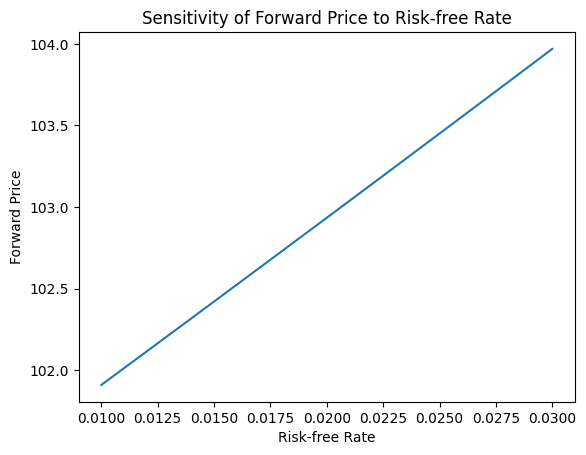

In [52]:
# Example: Sensitivity to interest rate changes
S = df['y'].iloc[-1]
r_values = np.linspace(0.01, 0.03, 10)
F_values = [S * np.exp((r - q) * T) for r in r_values]

plt.plot(r_values, F_values)
plt.xlabel('Risk-free Rate')
plt.ylabel('Forward Price')
plt.title('Sensitivity of Forward Price to Risk-free Rate')
plt.show()

In [2]:
"""
CONCLUSION
To price and hedge a delta-one forward exposure, the data was first preprocessed by accounting for the missing values and standardized. 
Subsequently, PCA was performed on the correlated equity prices of the three companies involved in the production/sale of the spot commodity.
Thereafter, a linear regression model was fitted, which gave a good R-square and adjusted R-square fit, and this model was used to calculate the hedge portfolio. 
As a final step, hedge MSE was calculated using the predicted and given commodity spot prices and used to calculate the forward price using a risk-free rate of 2% and convenience yield of 1%.To keep things simple, I have used a static hedge, however, the use case of dynamic hedge can also be accomplished by the above logic by periodic rebalancing.
"""

'\nCONCLUSION\nTo price and hedge a delta-one forward exposure, the data was first preprocessed by accounting for the missing values and standardized. \nSubsequently, PCA was performed on the correlated equity prices of the three companies involved in the production/sale of the spot commodity.\nThereafter, a linear regression model was fitted, which gave a good R-square and adjusted R-square fit, and this model was used to calculate the hedge portfolio.\xa0\nAs a final step, hedge MSE was calculated using the predicted and given commodity spot prices and used to calculate the forward price using a risk-free rate of 2% and convenience yield of 1%.To keep things simple, I have used a static hedge, however, the use case of dynamic hedge can also be accomplished by the above logic by periodic rebalancing.\n'